# Análise Exploratória dos Dados (EDA)

In [23]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from dotenv import load_dotenv

In [2]:
# Carregar variáveis de ambiente do arquivo .env
load_dotenv()

# Obter caminhos do arquivo csv e do diretório de extração das variáveis de ambiente
raw_path = os.getenv('RAW_PATH')

In [3]:
# Carregar os dados em DataFrame 
df_imdb = pd.read_csv(f'{raw_path}/desafio_indicium_imdb.csv')

In [10]:
# Primeiras linhas
df_imdb.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [9]:
# Verificar o tipo de dados
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [6]:
# Verificar existência de valores nulos
df_imdb.isnull().any()

Unnamed: 0       False
Series_Title     False
Released_Year    False
Certificate       True
Runtime          False
Genre            False
IMDB_Rating      False
Overview         False
Meta_score        True
Director         False
Star1            False
Star2            False
Star3            False
Star4            False
No_of_Votes      False
Gross             True
dtype: bool


## Estatísticas descritivas

Colunas numéricas

In [8]:
df_imdb.describe(include=['float64', 'int64']).transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,999.0,500.000000,288.530761,1.0,250.5,500.0,749.5,999.0
IMDB_Rating,999.0,7.947948,0.272290,7.6,7.7,7.9,8.1,9.2
Meta_score,842.0,77.969121,12.383257,28.0,70.0,79.0,87.0,100.0
No_of_Votes,999.0,271621.422422,320912.621055,25088.0,55471.5,138356.0,373167.5,2303232.0


In [17]:
menor_voto = df_imdb['No_of_Votes'].min()
maior_voto = df_imdb['No_of_Votes'].max()
relacao_menor_maior_voto = (menor_voto / maior_voto) * 100
print(f'O filme com menor nª de votos recebeu {relacao_menor_maior_voto:.2f}% dos votos do mais votado.')

O filme com menor nª de votos recebeu 1.09% dos votos do mais votado.


In [22]:
maior_voto_imdb = df_imdb['IMDB_Rating'].max()
filme_maior_nota = df_imdb.loc[df_imdb['IMDB_Rating'] == maior_voto_imdb]

titulo_filme_maior_nota = filme_maior_nota['Series_Title'].values[0]

print(f'O filme com a maior nota IMDb é "{titulo_filme_maior_nota}" e recebeu {maior_voto_imdb}.')


O filme com a maior nota IMDb é "The Godfather" e recebeu 9.2.


Colunas categóricas

In [11]:
df_imdb.describe(include=['object']).transpose()

,count,unique,top,freq
Series_Title,999,998,Drishyam,2
Released_Year,999,100,2014,32
Certificate,898,16,U,234
Runtime,999,140,100 min,23
Genre,999,202,Drama,84
Overview,999,999,A man in London tries to help a counter-espion...,1
Director,999,548,Alfred Hitchcock,14
Star1,999,659,Tom Hanks,12
Star2,999,840,Emma Watson,7
Star3,999,890,Rupert Grint,5


Series_Title
- Total: 999 filmes
- Valores Únicos: 998 títulos diferentes
- Mais Frequente: "Drishyam" (2 ocorrências)

Released_Year
- Total: 999 filmes
- Valores Únicos: 100 anos diferentes
- Ano Mais Frequente: 2014 (32 filmes lançados nesse ano)

Certificate
- Total: 898 filmes possuem certificado
- Valores Únicos: 16 diferentes tipos de certificado
- Mais Frequente: "U" (234 ocorrências)

Runtime
- Total: 999 filmes
- Valores Únicos: 140 diferentes durações
- Duração Mais Frequente: 100 minutos (23 ocorrências)

Genre
- Total: 999 filmes
- Valores Únicos: 202 gêneros diferentes
- Mais Frequente: "Drama" (84 ocorrências)

Overview
- Total: 999 resumos de filmes
- Valores Únicos: 999 resumos diferentes
- Mais Frequente: Um resumo específico aparece apenas uma vez ("A man in London tries to help a counter-espion...")

Director
- Total: 999 filmes
- Valores Únicos: 548 diretores diferentes
- Mais Frequente: Alfred Hitchcock (14 filmes)

Star1
- Total: 999 filmes
- Valores Únicos: 659 atores principais diferentes
- Mais Frequente: Tom Hanks (12 filmes)

Star2
- Total: 999 filmes
- Valores Únicos: 840 atores secundários diferentes
- Mais Frequente: Emma Watson (7 filmes)

Star3
- Total: 999 filmes
- Valores Únicos: 890 atores terciários diferentes
- Mais Frequente: Rupert Grint (5 filmes)

Star4
- Total: 999 filmes
- Valores Únicos: 938 atores quaternários diferentes
- Mais Frequente: Michael Caine (4 filmes)

Gross
- Total: 830 filmes possuem valores de bilheteria registrados
- Valores Únicos: 822 valores de bilheteria diferentes
- Mais Frequente: 4,360,000 (5 ocorrências)

**Conclusão**

 Os dados fornecem insights sobre a diversidade de filmes em termos de títulos, anos de lançamento, certificados, durações, gêneros e outros aspectos. Alfred Hitchcock é o diretor mais frequente na lista, e Tom Hanks é o ator principal mais frequente. O ano de 2014 é o mais representado, com 32 filmes, e o gênero "Drama" é o mais comum. Além disso, a maioria dos filmes tem durações variadas, mas 100 minutos é a duração mais recorrente. Em termos de bilheteria, o valor de 4,360,000 aparece mais frequentemente, embora haja uma grande variedade de valores registrados.


## Visualizações

Distribuição da nota do IMDB

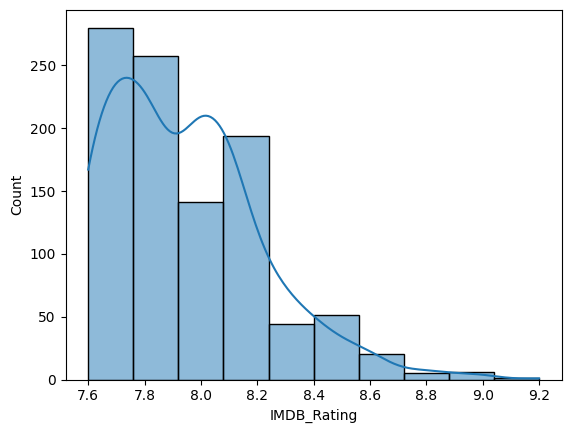

In [26]:
sns.histplot(df_imdb['IMDB_Rating'], bins=10, kde=True)
plt.show()

10 gêneros mais frequentes

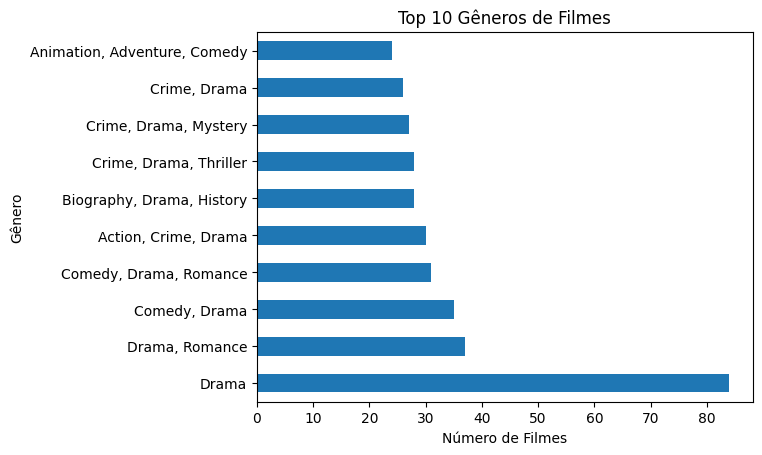

In [28]:
top_genres = df_imdb['Genre'].value_counts().nlargest(10) 
top_genres.plot(kind='barh')
plt.xlabel('Número de Filmes')
plt.ylabel('Gênero')
plt.title('Top 10 Gêneros de Filmes')
plt.show()

Distribuição de gêneros ao longo do tempo

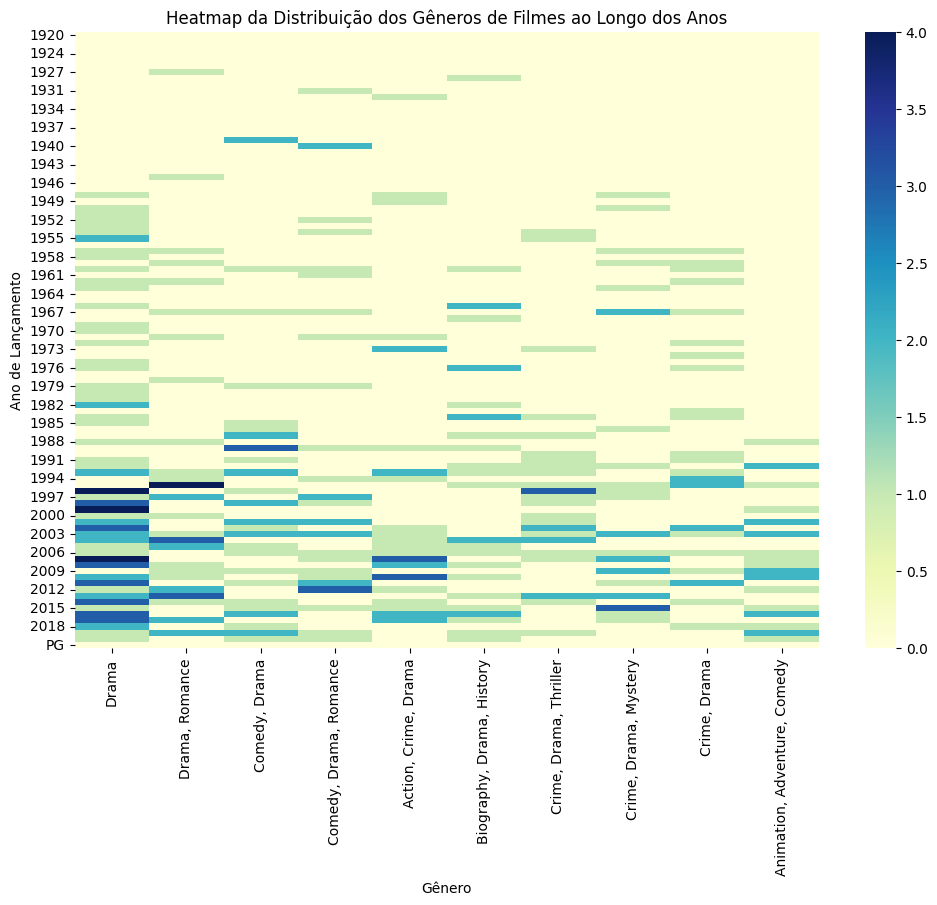

In [30]:
# Criando uma tabela pivô com contagem de gêneros por ano
genre_counts_pivot = df_imdb.pivot_table(index='Released_Year', columns='Genre', aggfunc='size', fill_value=0)

# Selecionando os gêneros mais frequentes
top_genres = genre_counts_pivot.sum().nlargest(10).index

# Filtrando os dados para os gêneros mais frequentes
genre_counts_filtered = genre_counts_pivot[top_genres]

# Plotando um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(genre_counts_filtered, cmap='YlGnBu')
plt.xlabel('Gênero')
plt.ylabel('Ano de Lançamento')
plt.title('Heatmap da Distribuição dos Gêneros de Filmes ao Longo dos Anos')
plt.show()

## Respostas às Perguntas

## Filme recomendado

Análise subjetiva baseada nas características gerais do dataset (exemplo: alta nota no IMDb, alta receita).

In [47]:
filme_recomendado = df_imdb[df_imdb['IMDB_Rating'] == df_imdb['IMDB_Rating'].max()]

# Acessando diretamente os valores de Series_Title e IMDB_Rating
titulo_filme = filme_recomendado['Series_Title'].values[0]
nota_imdb = filme_recomendado['IMDB_Rating'].values[0]

print(f'Filme recomendado: {titulo_filme} \nNota IMDb: {nota_imdb}')


Filme recomendado: The Godfather 
Nota IMDb: 9.2


## Fatores relacionados ao faturamento

Análise de correlação entre Gross e Diretores e Atores. Ver arquivo "analysis_gross.ipynb"

## Insights da coluna Overview

Processamento de linguagem natural (NLP) para analisar a coluna Overview.

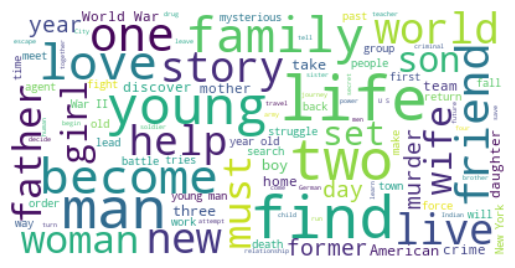

In [54]:
from wordcloud import WordCloud

text = " ".join(overview for overview in df_imdb.Overview.dropna())
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


### Insights da Nuvem de Palavras - Resumos de Filmes

#### Temas Dominantes:
- A nuvem de palavras destaca temas como "amor", "família", "vida", indicando que esses são temas frequentemente explorados nos resumos dos filmes analisados.

#### Gêneros Populares:
- Palavras como "ação", "comédia" e "drama" são visualmente proeminentes, sugerindo uma variedade de gêneros que podem estar presentes nos filmes analisados.

#### Foco na Audiência:
- Palavras como "vida", "pai", "esposa", "filho", e "mundo" indicam que os filmes frequentemente abordam temas relacionados à experiência humana e à vida cotidiana, visando atrair uma audiência emocionalmente engajada.

#### Potencial para Desenvolvimento de Conteúdo:
- Baseado na nuvem de palavras, recomenda-se explorar mais filmes que enfatizem temas de família e mistério, que parecem ser populares entre o público-alvo.

#### Estratégias de Marketing e Promoção:
- Os insights da nuvem de palavras podem orientar estratégias de marketing para destacar elementos como romance e ação nos filmes, alinhando-se melhor com as expectativas e interesses do público.
